In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
import seaborn as sns


data_train = pd.read_csv('X_train_rakuten_update.csv',index_col=0)
data_test = pd.read_csv('X_test_rakuten_update.csv',index_col=0)
target = pd.read_csv('Y_train_rakuten_CVw08PX.csv',index_col=0)
#data_full = pd.concat([data_train, target], axis = 1)
print("shape of training set of Rakuten products       :",data_train.shape)
print("shape of labels vector related to train set     :",target.shape)
print("shape of test set of Rakuten products           :",data_test.shape,"\n")
print(data_train.info())
display(data_train.head(10))
display(target.head(10))
#  designation field written in french,  german and english languages  at least

shape of training set of Rakuten products       : (84916, 4)
shape of labels vector related to train set     : (84916, 1)
shape of test set of Rakuten products           : (13812, 4) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
None


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830
6,Christof E: Bildungsprozessen Auf Der Spur,NaN,91920807,907794536
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347
8,Puzzle Scooby-Doo Avec Poster 2x35 Pieces,NaN,4239126071,1325918866
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705
5,2280
6,10
7,2522
8,1280
9,2582


number of classes : 27 

list of product type codes (classes) :
 [  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301] 



,prdtypecode,relative % of dataset
0,2583,12.0
2,1300,6.0
3,2060,6.0
4,2522,6.0
5,1280,6.0
6,2403,6.0
7,2280,6.0
1,1560,6.0
8,1920,5.0
9,1160,5.0



top10 product type codes represents 64.0 % of dataset


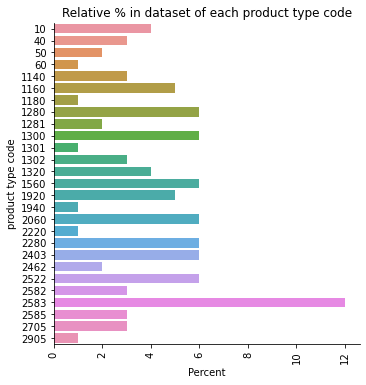

In [74]:
print("number of classes :",len(target['prdtypecode'].unique()),"\n")
print("list of product type codes (classes) :\n",target['prdtypecode'].unique(),"\n")
#print("number of products for each product type code :\n",target['prdtypecode'].value_counts())
#print("\nRelative % in dataset of each product type code :\n",np.round(target['prdtypecode'].value_counts(normalize=True)*100),2)

prdtypecode_count = target['prdtypecode'].value_counts(normalize=True)*100
dataviz_code = pd.DataFrame(prdtypecode_count)
dataviz_code = dataviz_code.reset_index()
dataviz_code = dataviz_code.rename(columns={"index": "prdtypecode", "prdtypecode": "relative % of dataset"})
dataviz_code['relative % of dataset'] = np.round(dataviz_code['relative % of dataset'])
dataviz_code = dataviz_code.sort_values('relative % of dataset',ascending=False)
display(dataviz_code.head(len(dataviz_code)))
sns.catplot(x="relative % of dataset",y="prdtypecode",orient="h",kind="bar",data=dataviz_code)
plt.xlabel("Percent")
plt.ylabel("product type code") 
plt.title("Relative % in dataset of each product type code")
plt.xticks(rotation=90);

sum_top10 = round(dataviz_code['relative % of dataset'].head(10).sum())
print("\ntop10 product type codes represents {0} % of dataset".format(sum_top10))
# products distributed over 27 classes (product type code)
# dataset imbalanced with class 2583 being oversampled (12%)
# and 6 classes undersampled (1%) and other 3 at 2%

In [75]:
#Display number and percentage of missing values in dataframe
df_nul = pd.DataFrame({'Nbr of NaN': data_train.isnull().sum(), 'Percentage': round(100*data_train.isnull().sum()/len(data_train))})

#Display columns with missing values and importance in % for decision-making aid
print("\nFirst check of NaN present in raw dataset :")
display(df_nul[df_nul['Nombre'] > 0] )
# the description field is not filled for 29800 products

#Display NaN rate per class 
df1 = data_train.join(target)
df1 = df1.drop(['designation','productid','imageid'], axis=1)
list_class = []
list_nbr_nan =[]
list_nbr_class = []
list_percent_nan = []
i=0
for element in target['prdtypecode'].unique():
    list_class.append(element)
    list_nbr_nan.append(df1[df1['prdtypecode'] == element]['description'].isnull().sum())
    list_nbr_class.append(df1[df1['prdtypecode'] == element]['prdtypecode'].value_counts().iloc[0])
    list_percent_nan.append(round(( list_nbr_nan[i] / list_nbr_class[i])*100))
    i += 1
    
df2 = pd.DataFrame({'Class': list_class, 'Nbr of NaN': list_nbr_nan, 'Nbr of products': list_nbr_class, '% NaN': list_percent_nan})
   
df2 = df2.sort_values('% NaN',ascending=False)   
display(df2.head(len(df2)))
#    print("nbr of missing values for class {0} : ".format(element))
#    print("number NaN :",nbr_nan)
#    print("number items in this class :",nbr_class.iloc[0])
#    print("relative % of NaN for this class :",percent,"%")
    
    


First check of NaN present in raw dataset :


,Nombre,Percentage
description,29800,35.0


,Class,Nbr of NaN,Nbr of products,% NaN
10,2403,4648,4774,97.0
15,2462,1368,1421,96.0
1,2280,4440,4760,93.0
16,1160,3604,3953,91.0
0,10,2778,3116,89.0
13,1180,611,764,80.0
18,40,1642,2508,65.0
11,1140,1726,2671,65.0
4,2705,1025,2761,37.0
20,1320,1101,3241,34.0


In [76]:
# add column with name of associated product image
data_train['nom_img'] = "image_" + data_train.imageid.astype(str) + "_product_" + data_train.productid.astype(str) + ".jpg"
data_train = data_train.drop(['productid','imageid'],axis=1)
data_train.head()


,designation,description,nom_img
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,image_1263597046_product_3804725264.jpg
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,image_1008141237_product_436067568.jpg
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,image_938777978_product_201115110.jpg
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,image_457047496_product_50418756.jpg
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,image_1077757786_product_278535884.jpg


In [40]:
#text mining in this notebook, computer vision in second step

# one-shot display to be commented later, to estimate visually the diversity within each group
# for every type code , display 10 images of related products stored under this class
# to understand if the classification is logic for an human point of view (not always obvious for me at least)
# before thinking to requesting a model to do this task :-)
# If helpful for us decide for a generic name for the 27 classes.....
# class 2583 : swimming pool equipments :-)

#for i in target['prdtypecode'].unique() : 
#    print("10 images of products of class :",i,"\n")
#    ten_products = target[target['prdtypecode'] == i].head(10)
#    image_list = []
#   designation_list = []
#    for j in ten_products.index :
#        image_list.append(data_train.iloc[j,4])
#        designation_list.append(data_train.iloc[j,0])

#    for k,l in zip(image_list,designation_list) :
#        print(l,":\n")
#        image = img.imread('./images/image_train/'+ k)
#        plt.imshow(image)
#        plt.axis('off');
#        plt.show()
                
 
